In [ ]:
from google.colab import files
import zipfile
import os

# Uploading ZIP
uploaded = files.upload()

# Unzipping the uploaded file
for filename in uploaded.keys():
    if filename.endswith(".zip"):
        zip_ref = zipfile.ZipFile(filename, 'r')
        zip_ref.extractall("/content")
        zip_ref.close()
        print(f"Extracted archive (10) to /content")

Saving archive (10).zip to archive (10).zip
Extracted archive (10) to /content


In [ ]:
import os

# List folders in /content
for f in os.listdir("/content"):
    print(f)


.config
dataset-master
dataset2-master
archive (10).zip
sample_data


In [ ]:
import zipfile
import os

zip_path = "/content/archive (10).zip"
extract_path = "/content/C-NMC"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Extracted to: {extract_path}")

✅ Extracted to: /content/C-NMC


In [ ]:
for root, dirs, files in os.walk("/content/C-NMC"):
    print(f"{root} - {len(files)} files")

/content/C-NMC - 0 files
/content/C-NMC/dataset-master - 0 files
/content/C-NMC/dataset-master/dataset-master - 1 files
/content/C-NMC/dataset-master/dataset-master/Annotations - 343 files
/content/C-NMC/dataset-master/dataset-master/JPEGImages - 366 files
/content/C-NMC/dataset2-master - 0 files
/content/C-NMC/dataset2-master/dataset2-master - 1 files
/content/C-NMC/dataset2-master/dataset2-master/images - 0 files
/content/C-NMC/dataset2-master/dataset2-master/images/TEST - 0 files
/content/C-NMC/dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE - 620 files
/content/C-NMC/dataset2-master/dataset2-master/images/TEST/NEUTROPHIL - 624 files
/content/C-NMC/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL - 623 files
/content/C-NMC/dataset2-master/dataset2-master/images/TEST/MONOCYTE - 620 files
/content/C-NMC/dataset2-master/dataset2-master/images/TEST_SIMPLE - 0 files
/content/C-NMC/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE - 6 files
/content/C-NMC/dataset2

Data Preparation

In [ ]:

!pip install matplotlib-venn


In [ ]:
!apt-get -qq install -y libfluidsynth1


E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.8 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=b0b31c425e1cde22642057e0c39c09bedb5efb42ed40b3173cd84b64d79c6b3e
  Stored in directory: /root/.cache/pip/wheels/29/20/ab/f101da7b245b996aa097685ef742243725ea6150f5b3b6d9ed
Successfully built libarchive


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot


In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.7 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = "/content/C-NMC"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 10305 images belonging to 2 classes.
Found 2576 images belonging to 2 classes.


ResNet50 Model Training

In [ ]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

num_classes = train_data.num_classes
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[checkpoint]
)

model.save("leukemia_resnet_model.h5")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.9812 - loss: 0.0381

323/323 ━━━━━━━━━━━━━━━━━━━━ 213s 437ms/step - accuracy: 0.9812 - loss: 0.0380 - val_accuracy: 0.9717 - val_loss: 0.5214
Epoch 2/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 108s 334ms/step - accuracy: 0.9999 - loss: 4.9712e-04 - val_accuracy: 0.9717 - val_loss: 0.1527
Epoch 3/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 108s 333ms/step - accuracy: 1.0000 - loss: 2.4230e-05 - val_accuracy: 0.9717 - val_loss: 0.1956
Epoch 4/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.9999 - loss: 0.0011

323/323 ━━━━━━━━━━━━━━━━━━━━ 153s 366ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9911 - val_loss: 0.0194
Epoch 5/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 1.0000 - loss: 9.4822e-05

323/323 ━━━━━━━━━━━━━━━━━━━━ 115s 355ms/step - accuracy: 1.0000 - loss: 9.4719e-05 - val_accuracy: 1.0000 - val_loss: 3.3589e-05
Epoch 6/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 108s 333ms/step - accuracy: 1.0000 - loss: 5.9013e-05 - val_accuracy: 1.0000 - val_loss: 1.0147e-05
Epoch 7/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 108s 334ms/step - accuracy: 1.0000 - loss: 8.5916e-06 - val_accuracy: 1.0000 - val_loss: 6.8539e-06
Epoch 8/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 111s 343ms/step - accuracy: 1.0000 - loss: 6.4053e-06 - val_accuracy: 1.0000 - val_loss: 3.4768e-06
Epoch 9/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 139s 334ms/step - accuracy: 1.0000 - loss: 8.8013e-06 - val_accuracy: 1.0000 - val_loss: 5.9718e-06
Epoch 10/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 107s 332ms/step - accuracy: 1.0000 - loss: 6.0736e-06 - val_accuracy: 1.0000 - val_loss: 4.5112e-06


In [ ]:
from google.colab import files
files.download("leukemia_resnet_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Grad-CAM Visualization

In [ ]:
import os

# List folders under /content
for root, dirs, files in os.walk("/content"):
    print("DIR:", root)
    for d in dirs:
        print("  -", d)

DIR: /content
  - .config
  - dataset-master
  - C-NMC
  - dataset2-master
  - sample_data
DIR: /content/.config
  - logs
  - configurations
DIR: /content/.config/logs
  - 2025.08.21
DIR: /content/.config/logs/2025.08.21
DIR: /content/.config/configurations
DIR: /content/dataset-master
  - dataset-master
DIR: /content/dataset-master/dataset-master
  - Annotations
  - JPEGImages
DIR: /content/dataset-master/dataset-master/Annotations
DIR: /content/dataset-master/dataset-master/JPEGImages
DIR: /content/C-NMC
  - dataset-master
  - dataset2-master
DIR: /content/C-NMC/dataset-master
  - dataset-master
DIR: /content/C-NMC/dataset-master/dataset-master
  - Annotations
  - JPEGImages
DIR: /content/C-NMC/dataset-master/dataset-master/Annotations
DIR: /content/C-NMC/dataset-master/dataset-master/JPEGImages
DIR: /content/C-NMC/dataset2-master
  - dataset2-master
DIR: /content/C-NMC/dataset2-master/dataset2-master
  - images
DIR: /content/C-NMC/dataset2-master/dataset2-master/images
  - TEST
  - 

In [ ]:
import os

# Update path to a real image directory
image_folder = "/content/dataset2-master"

# List available image files
image_files = os.listdir(image_folder)
image_files = [f for f in image_files if f.endswith(".png") or f.endswith(".jpg")]

# Confirm at least one image exists
if len(image_files) == 0:
    print("No image files found in the folder.")
else:
    # Use the first image found
    sample_image_path = os.path.join(image_folder, image_files[0])
    print("Sample image path:", sample_image_path)

    # Call Grad-CAM (assuming your function is already defined)
    get_gradcam(sample_image_path, model)

No image files found in the folder.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
import os

# ✅ Load your trained ResNet model
model = load_model("/content/leukemia_resnet_model.h5")

def get_gradcam(img_path, model, layer_name='conv5_block3_out'):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_img = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlayed = cv2.addWeighted(img, 0.6, heatmap_img, 0.4, 0)

    plt.imshow(overlayed[..., ::-1])
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()

# ✅ Pick first image from training folder
image_folder = "/content/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE"
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

if image_files:
    sample_image_path = os.path.join(image_folder)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to test directory
test_dir = '/content/dataset2-master/dataset2-master/images/TEST'

# ImageDataGenerator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # or 'sparse' if labels are integers
    shuffle=False
)


Found 2487 images belonging to 4 classes.


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
test_dir = '/content/C-NMC'  # directory containing ALL/ and HEM/
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 12881 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


403/403 ━━━━━━━━━━━━━━━━━━━━ 50s 104ms/step - accuracy: 1.0000 - loss: 2.8262e-06
Test Loss: 0.0000
Test Accuracy: 100.00%


In [ ]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 23,538,690 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # or True to fine-tune

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print(test_generator.class_indices)

{'dataset-master': 0, 'dataset2-master': 1}


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 2487 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 17s 163ms/step
📊 Classification Report:

              precision    recall  f1-score   support

  EOSINOPHIL       0.16      0.01      0.02       623
  LYMPHOCYTE       0.00      0.00      0.00       620
    MONOCYTE       0.25      0.99      0.40       620
  NEUTROPHIL       0.00      0.00      0.00       624

    accuracy                           0.25      2487
   macro avg       0.10      0.25      0.10      2487
weighted avg       0.10      0.25      0.10      2487



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


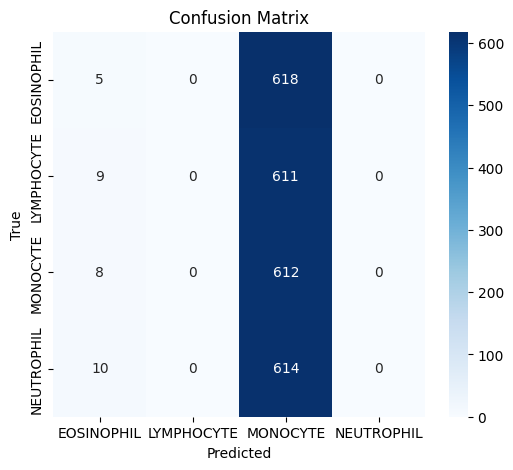

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a new test_generator pointing to the correct directory with 4 classes
test_dir_4_classes = '/content/C-NMC/dataset2-master/dataset2-master/images/TEST'
test_datagen_4_classes = ImageDataGenerator(rescale=1./255)

test_generator_4_classes = test_datagen_4_classes.flow_from_directory(
    test_dir_4_classes,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # or 'sparse' if labels are integers
    shuffle=False
)


# Ground truth and predictions
Y_true = test_generator_4_classes.classes
Y_pred_probs = model.predict(test_generator_4_classes)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Match class indices to names
target_names = [k for k, v in sorted(test_generator_4_classes.class_indices.items(), key=lambda item: item[1])]

# Classification Report
print("📊 Classification Report:\n")
print(classification_report(Y_true, Y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
pip install streamlit opencv-python pillow tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 134.8 MB/s eta 0:00:00


In [ ]:
# Save this as app.py and run with: streamlit run app.py
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2
import os

# Load model
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("leukemia_resnet_model.h5")

model = load_model()
class_names = ["Normal", "Abnormal"]


def preprocess_image(uploaded_file):
    image = Image.open(uploaded_file).convert("RGB").resize((224, 224))
    img_array = np.array(image) / 255.0
    return np.expand_dims(img_array, axis=0), image

def grad_cam(image_array, model, class_index, layer_name="conv5_block3_out"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image_array)
        loss = predictions[:, class_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + 1e-8
    return heatmap.numpy()

def overlay_gradcam(original_img, heatmap, alpha=0.4):
    img = np.array(original_img.resize((224, 224)))
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)
    return overlay

# Streamlit UI
st.set_page_config(page_title="Blood Smear Cancer Diagnosis", layout="centered")
st.title("🧬 Blood Smear Cancer Diagnosis with Grad-CAM")

uploaded_file = st.file_uploader("Upload a blood smear image", type=["jpg", "png", "jpeg"])

if uploaded_file:
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    with st.spinner("Analyzing..."):
        image_array, original_img = preprocess_image(uploaded_file)
        prediction = model.predict(image_array)[0]
        pred_index = np.argmax(prediction)
        confidence = prediction[pred_index] * 100

        heatmap = grad_cam(image_array, model, pred_index)
        cam_img = overlay_gradcam(original_img, heatmap)

        st.markdown(f"### 🩺 Diagnosis: `{class_names[pred_index]}`")
        st.markdown(f"### 📊 Confidence: `{confidence:.2f}%`")

        st.image(cam_img, caption="Grad-CAM Visualization", use_column_width=False)


2025-08-22 18:32:30.504 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:32:30.801 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-22 18:32:30.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:32:30.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:32:30.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:32:31.307 Thread 'Thread-29': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:32:31.308 Thread 'Thread-29': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:32:31.310 Thread 'Thread-29': missi

In [ ]:

!pip install streamlit opencv-python-headless tensorflow pillow matplotlib -q
!npm install -g localtunnel > /dev/null 2>&1


In [ ]:
# Save this as app.py and run with: streamlit run app.py
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2
import os

# Load model
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("leukemia_resnet_model.h5")

model = load_model()
class_names = ["Normal", "Abnormal"]


def preprocess_image(uploaded_file):
    image = Image.open(uploaded_file).convert("RGB").resize((224, 224))
    img_array = np.array(image) / 255.0
    return np.expand_dims(img_array, axis=0), image

def grad_cam(image_array, model, class_index, layer_name="conv5_block3_out"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image_array)
        loss = predictions[:, class_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + 1e-8
    return heatmap.numpy()

def overlay_gradcam(original_img, heatmap, alpha=0.4):
    img = np.array(original_img.resize((224, 224)))
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)
    return overlay

# Streamlit UI
st.set_page_config(page_title="Blood Smear Cancer Diagnosis", layout="centered")
st.title("🧬 Blood Smear Cancer Diagnosis with Grad-CAM")

uploaded_file = st.file_uploader("Upload a blood smear image", type=["jpg", "png", "jpeg"])

if uploaded_file:
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    with st.spinner("Analyzing..."):
        image_array, original_img = preprocess_image(uploaded_file)
        prediction = model.predict(image_array)[0]
        pred_index = np.argmax(prediction)
        confidence = prediction[pred_index] * 100

        heatmap = grad_cam(image_array, model, pred_index)
        cam_img = overlay_gradcam(original_img, heatmap)

        st.markdown(f"### 🩺 Diagnosis: `{class_names[pred_index]}`")
        st.markdown(f"### 📊 Confidence: `{confidence:.2f}%`")

        st.image(cam_img, caption="Grad-CAM Visualization", use_column_width=False)

2025-08-22 18:52:26.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:52:26.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:52:26.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:52:26.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:52:26.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:52:26.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:52:26.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:52:26.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install streamlit

In [ ]:
!nohup streamlit run sZhZMFETY76Y --server.enableCORS false --server.enableXsrfProtection false --server.port 8501 > app.log 2>&1 &
import time
time.sleep(3)
!grep -o 'http://[^ ]*' app.log| tail -n 1

In [ ]:
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8501 > /dev/null 2>&1 &


In [ ]:
# Save this as app.py and run with: streamlit run app.py
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2
import os

# Load model
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("leukemia_resnet_model.h5")

model = load_model()
class_names = ["Normal", "Abnormal"]


def preprocess_image(uploaded_file):
    image = Image.open(uploaded_file).convert("RGB").resize((224, 224))
    img_array = np.array(image) / 255.0
    return np.expand_dims(img_array, axis=0), image

def grad_cam(image_array, model, class_index, layer_name="conv5_block3_out"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image_array)
        loss = predictions[:, class_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + 1e-8
    return heatmap.numpy()

def overlay_gradcam(original_img, heatmap, alpha=0.4):
    img = np.array(original_img.resize((224, 224)))
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)
    return overlay

# Streamlit UI
st.set_page_config(page_title="Blood Smear Cancer Diagnosis", layout="centered")
st.title("🧬 Blood Smear Cancer Diagnosis with Grad-CAM")

uploaded_file = st.file_uploader("Upload a blood smear image", type=["jpg", "png", "jpeg"])

if uploaded_file:
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    with st.spinner("Analyzing..."):
        image_array, original_img = preprocess_image(uploaded_file)
        prediction = model.predict(image_array)[0]
        pred_index = np.argmax(prediction)
        confidence = prediction[pred_index] * 100

        heatmap = grad_cam(image_array, model, pred_index)
        cam_img = overlay_gradcam(original_img, heatmap)

        st.markdown(f"### 🩺 Diagnosis: `{class_names[pred_index]}`")
        st.markdown(f"### 📊 Confidence: `{confidence:.2f}%`")

        st.image(cam_img, caption="Grad-CAM Visualization", use_column_width=False)

2025-08-22 18:54:36.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:54:36.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:54:36.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:54:36.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:54:36.120 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:54:36.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:54:36.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 18:54:36.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,591,812 (90.00 MB)

 Trainable params: 23,538,690 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
from google colab

In [ ]:
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8502 > app.log 2>&1 &
import time
time.sleep(5)  # Increased wait time
log_content = !cat app.log
url = None
for line in log_content:
    if 'http://' in line:
        url = line.split('http://')[-1].split(' ')[0]
        break

if url:
    print(f"Public URL: http://{url}")
else:
    print("Could not find the public URL in the log file. Log content:")
    for line in log_content:
        print(line)

Could not find the public URL in the log file. Log content:
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8502 > app.log 2>&1 &
import time
time.sleep(5)  # Increased wait time
log_content = !cat app.log
url = None
for line in log_content:
    if 'http://' in line:
        url = line.split('http://')[-1].split(' ')[0]
        break

if url:
    print(f"Public URL: http://{url}")
else:
    print("Could not find the public URL in the log file. Log content:")
    for line in log_content:
        print(line)

Public URL: http://localhost:8502


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2
import os

# Load model
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("leukemia_resnet_model.h5")

model = load_model()
class_names = ["Normal", "Abnormal"]


def preprocess_image(uploaded_file):
    image = Image.open(uploaded_file).convert("RGB").resize((224, 224))
    img_array = np.array(image) / 255.0
    return np.expand_dims(img_array, axis=0), image

def grad_cam(image_array, model, class_index, layer_name="conv5_block3_out"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image_array)
        loss = predictions[:, class_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + 1e-8
    return heatmap.numpy()

def overlay_gradcam(original_img, heatmap, alpha=0.4):
    img = np.array(original_img.resize((224, 224)))
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)
    return overlay

# Streamlit UI
st.set_page_config(page_title="Blood Smear Cancer Diagnosis", layout="centered")
st.title("🧬 Blood Smear Cancer Diagnosis with Grad-CAM")

uploaded_file = st.file_uploader("Upload a blood smear image", type=["jpg", "png", "jpeg"])

if uploaded_file:
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    with st.spinner("Analyzing..."):
        image_array, original_img = preprocess_image(uploaded_file)
        prediction = model.predict(image_array)[0]
        pred_index = np.argmax(prediction)
        confidence = prediction[pred_index] * 100

        heatmap = grad_cam(image_array, model, pred_index)
        cam_img = overlay_gradcam(original_img, heatmap)

        st.markdown(f"### 🩺 Diagnosis: `{class_names[pred_index]}`")
        st.markdown(f"### 📊 Confidence: `{confidence:.2f}%`")

        st.image(cam_img, caption="Grad-CAM Visualization", use_column_width=False)

Writing app.py


In [ ]:
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8501 > /dev/null 2>&1 &


In [ ]:
!cat app.log

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
!grep -o 'http://[^ ]*' app.log | tail -n 1

http://35.198.237.254:8502


In [1]:
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8502 > app.log 2>&1 &
import time
time.sleep(5)  # Increased wait time
log_content = !cat app.log
url = None
for line in log_content:
    if 'http://' in line:
        url = line.split('http://')[-1].split(' ')[0]
        break

if url:
    print(f"Public URL: http://{url}")
else:
    print("Could not find the public URL in the log file. Log content:")
    for line in log_content:
        print(line)

Could not find the public URL in the log file. Log content:
nohup: failed to run command 'streamlit': No such file or directory


In [2]:
!pip install streamlit
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8502 > app.log 2>&1 &
import time
time.sleep(5)  # Increased wait time
log_content = !cat app.log
url = None
for line in log_content:
    if 'http://' in line:
        url = line.split('http://')[-1].split(' ')[0]
        break

if url:
    print(f"Public URL: http://{url}")
else:
    print("Could not find the public URL in the log file. Log content:")
    for line in log_content:
        print(line)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.6 MB/s eta 0:00:00
Could not find the public URL in the log file. Log content:
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [3]:
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8502 > app.log 2>&1 &
import time
time.sleep(5)
!lt --port 8502 --subdomain blood-smear-diagnosis

/bin/bash: line 1: lt: command not found


In [4]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 3s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [5]:
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8502 > app.log 2>&1 &
import time
time.sleep(5)
!lt --port 8502 --subdomain blood-smear-diagnosis

your url is: https://blood-smear-diagnosis.loca.lt
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:12329 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0


In [7]:
!pkill localtunnel
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8502 > app.log 2>&1 &
import time
time.sleep(5)
!lt --port 8502 --subdomain blood-smear-diagnosis

your url is: https://blood-smear-diagnosis.loca.lt
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:9581 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0


In [8]:
!pip install pyngrok

In [9]:
from pyngrok import ngrok
import os
import time

# Terminate any running ngrok tunnels
ngrok.kill()

# Get the authtoken from ngrok website and paste it here
# You can get one here: https://dashboard.ngrok.com/get-started/your-authtoken
NGROK_AUTH_TOKEN = "" #@param {type:"string"}

if NGROK_AUTH_TOKEN:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print("Ngrok auth token set.")
else:
    print("Please provide an ngrok auth token.")

# Start a Streamlit app in the background
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false --server.port 8502 > app.log 2>&1 &

# Give Streamlit some time to start
time.sleep(5)

# Open a tunnel to the Streamlit port
try:
    public_url = ngrok.connect(8502)
    print(f"Ngrok Public URL: {public_url}")
except Exception as e:
    print(f"Error creating ngrok tunnel: {e}")
    print("Please check if Streamlit is running and the port is correct.")
    print("You might also need to set your ngrok auth token.")

Please provide an ngrok auth token.


ERROR:pyngrok.process.ngrok:t=2025-08-31T04:51:40+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-31T04:51:40+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-31T04:51:40+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

Error creating ngrok tunnel: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.
Please check if Streamlit is running and the port is correct.
You might also need to set your ngrok auth token.
